In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


matplotlib.interactive(True)
plt.ion()
matplotlib.is_interactive()

True

In [2]:
df = pd.read_csv('C:/Users/GT MALL/Desktop/weathercheck.csv')

In [3]:
df.head()

,RespondentID,Do you typically check a daily weather report?,How do you typically check the weather?,A specific website or app (please provide the answer),"If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?",Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
0,3887201482,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$50,000 to $74,999",South Atlantic
1,3887159451,Yes,The default weather app on your phone,-,Very likely,18 - 29,Male,Prefer not to answer,-
2,3887152228,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$100,000 to $124,999",Middle Atlantic
3,3887145426,Yes,The default weather app on your phone,-,Somewhat likely,30 - 44,Male,Prefer not to answer,-
4,3887021873,Yes,A specific website or app (please provide the ...,Iphone app,Very likely,30 - 44,Male,"$150,000 to $174,999",Middle Atlantic


In [4]:
Variables_columns = df[['If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?',
                       'Age']]
Variables_columns = Variables_columns.dropna()

In [5]:
Variables_columns = Variables_columns.rename(columns={'If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?': 'Checking in with the device'})


### Chart 1
                                                            

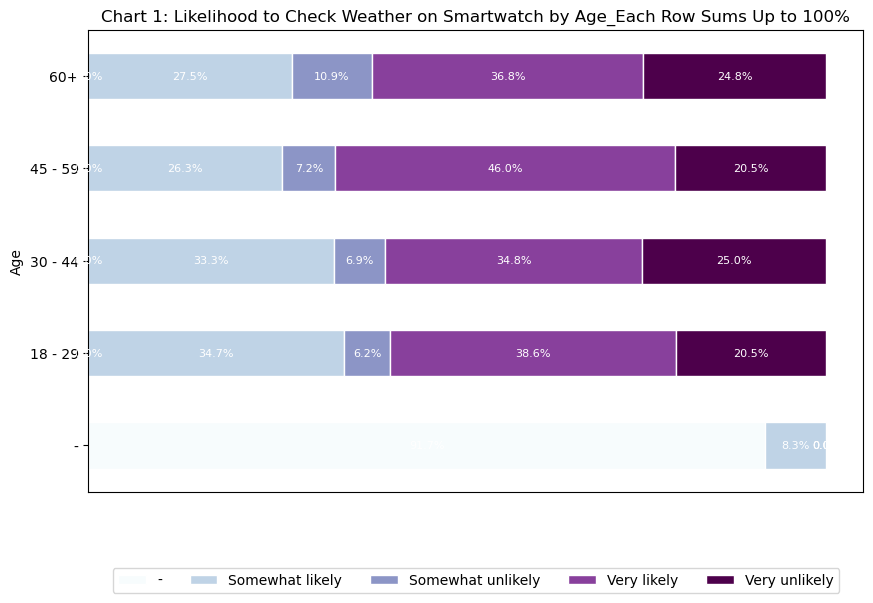

In [50]:
#Chart 1: each row sums up to 100%
chart1_data = pd.crosstab(Variables_columns['Age'], Variables_columns['Checking in with the device'],
                           normalize='index')
plt.figure(figsize=(10, 6))

chart1_data.plot(kind='barh', stacked=True, ax=plt.gca(), colormap='BuPu', edgecolor='white')

plt.title('Chart 1: Likelihood to Check Weather on Smartwatch by Age_Each Row Sums Up to 100%')
plt.ylabel('Age')  
plt.xticks([])

for i, age_group in enumerate(chart1_data.index):
    x_offset = 0
    for device in chart1_data.columns:
        plt.text(x_offset + chart1_data.loc[age_group, device] / 2, i,
                 f'{chart1_data.loc[age_group, device]:.1%}',
                 ha='center', va='center', fontsize=8, color='white')
        x_offset += chart1_data.loc[age_group, device]
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=len(chart1_data.columns))

plt.show()


### Chart 2

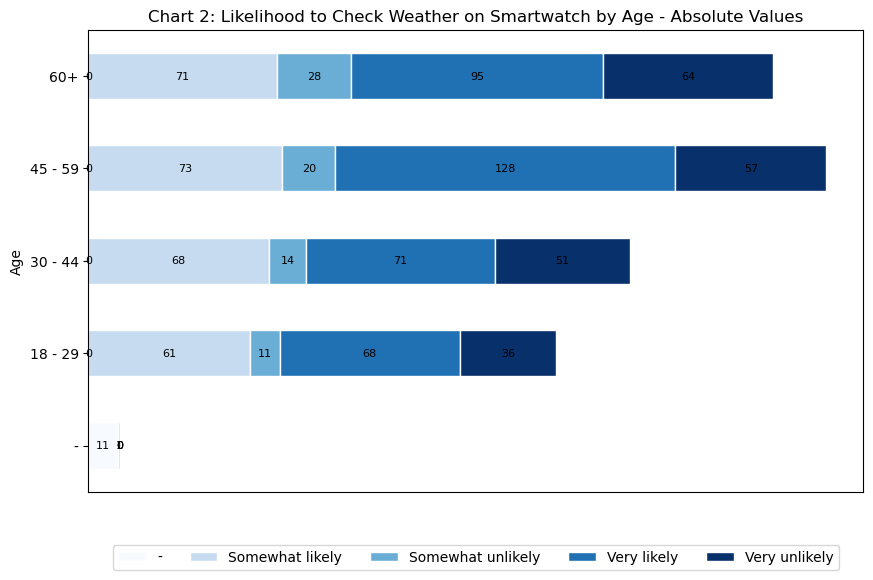

In [57]:
#Chart 2: absolute values
chart2_data = pd.crosstab(Variables_columns['Age'], Variables_columns['Checking in with the device'])
plt.figure(figsize=(10, 6))

chart2_data.plot(kind='barh', stacked=True, ax=plt.gca(), colormap='Blues', edgecolor='white')

plt.title('Chart 2: Likelihood to Check Weather on Smartwatch by Age - Absolute Values')
plt.ylabel('Age')
plt.xticks([])

for i, age_group in enumerate(chart2_data.index):
    x_offset = 0
    for device in chart2_data.columns:
        plt.text(x_offset + chart2_data.loc[age_group, device] / 2, i,
                 f'{chart2_data.loc[age_group, device]}',
                 ha='center', va='center', fontsize=8, color='black')
        x_offset += chart2_data.loc[age_group, device]
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=len(chart2_data.columns))
plt.show()
